In [1]:
# import sys, site
# from os.path import join, abspath
# from traceback import extract_tb, format_list, format_exception_only
from pyphocorehelpers.print_helpers import StackTraceFormatting

StackTraceFormatting.shadow_sitepackages()

Excluding sitepackages (library) directories from stacktraces: ['C:\\Users\\pho\\miniconda3\\envs\\phoviz_ultimate', 'C:\\Users\\pho\\miniconda3\\envs\\phoviz_ultimate\\lib\\site-packages']


In [ ]:
"""

https://stackoverflow.com/questions/31949760/how-to-limit-python-traceback-to-specific-files
vaultah answered Oct 9, 2015 at 15:43

They both use the traceback.extract_tb.
It returns "a list of “pre-processed” stack trace entries extracted from the traceback object"; all of them are instances of traceback.FrameSummary (a named tuple).
Each traceback.FrameSummary object has a filename field which stores the absolute path of the corresponding file.
We check if it starts with any of the directory paths provided as separate function arguments to determine if we'll need to exclude the entry (or keep it).

"""
def spotlight(*show):
    ''' Return a function to be set as new sys.excepthook.
        It will SHOW traceback entries for files from these directories. 
        https://stackoverflow.com/questions/31949760/how-to-limit-python-traceback-to-specific-files
        vaultah answered Oct 9, 2015 at 15:43
    '''
    show = tuple(join(abspath(p), '') for p in show)

    def _check_file(name):
        return name and name.startswith(show)

    def _print(type, value, tb):
        show = (fs for fs in extract_tb(tb) if _check_file(fs.filename))
        fmt = format_list(show) + format_exception_only(type, value)
        print(''.join(fmt), end='', file=sys.stderr)

    return _print

def shadow(*hide):
    ''' Return a function to be set as new sys.excepthook.
        It will HIDE traceback entries for files from these directories. 
        https://stackoverflow.com/questions/31949760/how-to-limit-python-traceback-to-specific-files
        vaultah answered Oct 9, 2015 at 15:43
    '''
    hide = tuple(join(abspath(p), '') for p in hide)

    def _check_file(name):
        print(f'shadow:\t name: {name}')
        return name and not name.startswith(hide)

    def _print(type, value, tb):
        rint(f'shadow:\t tb: {tb}')
        show = (fs for fs in extract_tb(tb) if _check_file(fs.filename))
        fmt = format_list(show) + format_exception_only(type, value)
        print(''.join(fmt), end='', file=sys.stderr)

    return _print

def restore_default():
    """ Restores the default sys.excepthook from sys.__excepthook__
    
    """
    sys.excepthook = sys.__excepthook__
    print(f'Restored the default sys.excepthook from sys.__excepthook__.')


restore_default()

# Gets the "sitepackges" library directories for exclusion from the stacktrace
curr_sitepackages = site.getsitepackages()
print(f'Excluding sitepackages (library) directories from stacktraces: {curr_sitepackages}')
sys.excepthook = shadow(*curr_sitepackages)

# """
# Note: Don't forget to restore sys.excepthook from sys.__excepthook__. Unfortunately, you won't be able to "patch-restore" it using a context manager.
# """

# Exception-Raising stack code for testing

In [ ]:
import jinja2
jinja2.Template('{%}')
# jinja2.exceptions.TemplateSyntaxError: unexpected '}'
#     Generates ~30 lines, but will only display 4

In [ ]:
import enum
enum.Enum('Faulty', 'a a', module=__name__)

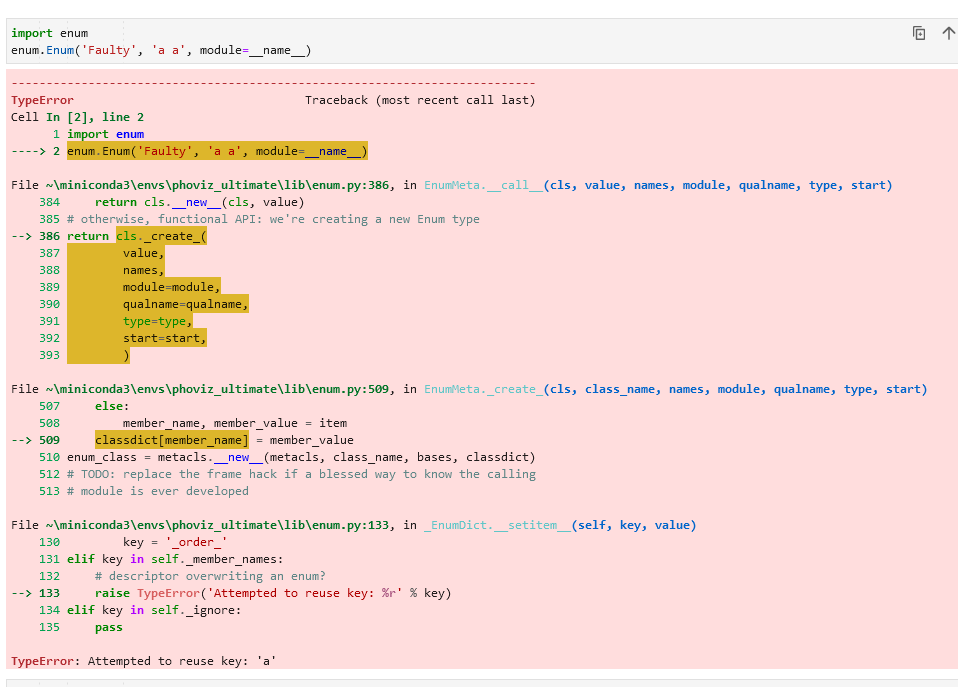